# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [6]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [8]:
# Importing the file porter_data_1.csv
df = pd.read_csv("C:\\Users\\aditk\\Downloads\\30688323-a1ea-4809-83c4-91d8096236c8-Delivery-Starter\\Delivery_Starter\\porter_data_1.csv")
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


In [9]:
print(df.shape)
print(df.info())
print(df.describe())

(175777, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  17577

In [10]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance'],
      dtype='object')

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [14]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [16]:
# Convert categorical features to category type

cat_cols = ['store_primary_category', 'order_protocol', 'market_id']

for col in cat_cols:
    df[col] = df[col].astype('category')

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [19]:
# Calculate time taken in minutes
df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [21]:
# Extract the hour and day of week from the 'created_at' timestamp
df['order_hour'] = df['created_at'].dt.hour
df['order_dayofweek'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['order_dayofweek'].isin([5, 6]).astype('int')
df['isWeekend'] = df['isWeekend'].astype('category')

In [22]:
# Drop unnecessary columns
df = df.drop(columns=['created_at','actual_delivery_time'])

In [23]:
df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,time_taken,order_hour,order_dayofweek,isWeekend
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0,22,4,0
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0,21,1,0
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0,0,0,0
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,59.0,3,3,0
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,46.0,2,1,0


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [26]:
df.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'time_taken', 'order_hour',
       'order_dayofweek', 'isWeekend'],
      dtype='object')

In [27]:
# Define target variable (y) and features (X)
y = df['time_taken']
X = df.drop(columns=['time_taken'])

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [33]:
# Define numerical and categorical columns for easy EDA and data manipulation
categorical_cols = X_train.select_dtypes(include=['category', 'object']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [34]:
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']
Numerical Columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

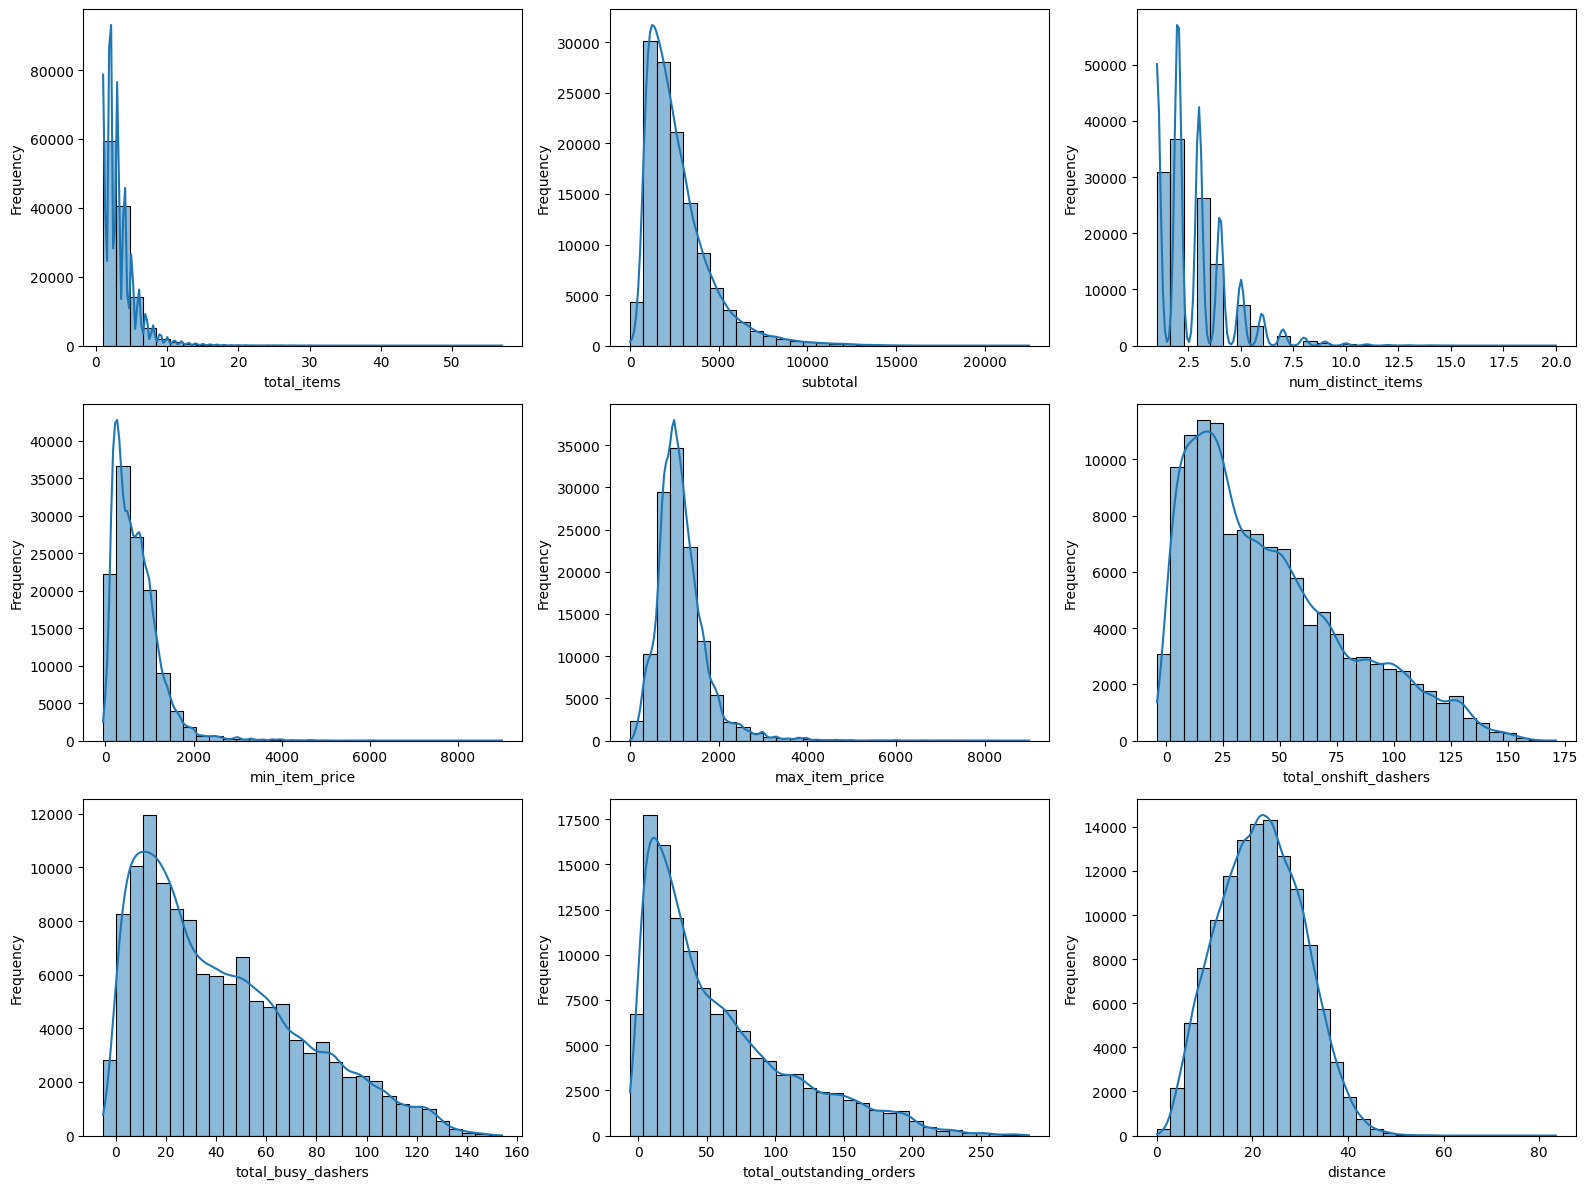

In [36]:
# Plot distributions for all numerical columns
plt.figure(figsize=(16, 12))

#instead of ploting seperatly we loop through numerical columns and plot at once
for i, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i + 1)
    sns.histplot(X_train[col], kde=True, bins=30)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

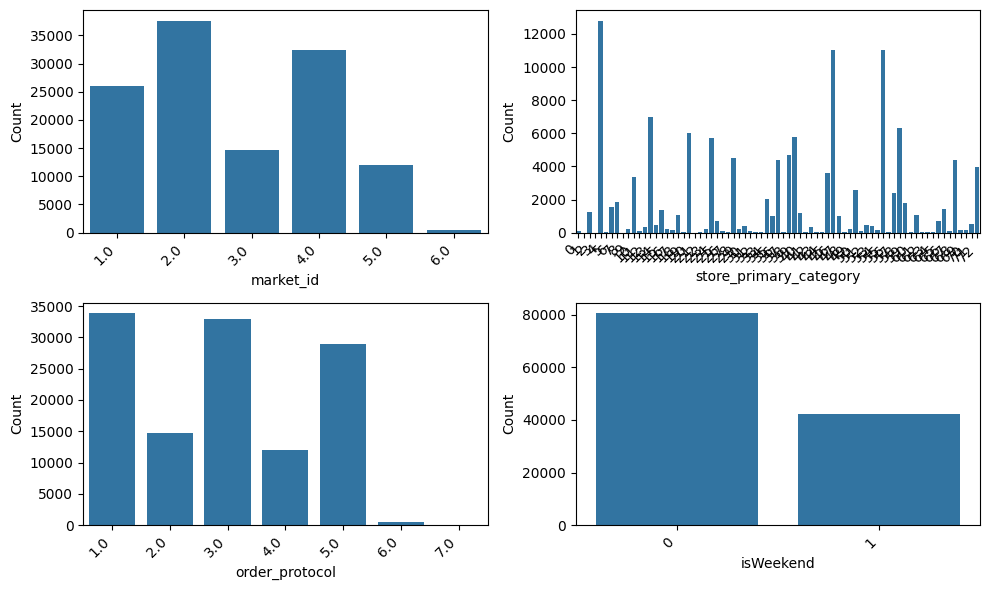

In [38]:
# Distribution of categorical columns
plt.figure(figsize=(10, 6))

for i, col in enumerate(categorical_cols):
    plt.subplot((len(categorical_cols) + 2) // 3, 2, i + 1)
    sns.countplot(data=X_train, x=col)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [39]:
categorical_cols.remove('store_primary_category')

In [40]:
X_train.drop('store_primary_category', axis = 1)
X_test.drop('store_primary_category', axis = 1)

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,order_hour,order_dayofweek,isWeekend
109371,1.0,3.0,1,3095,1,3095,3095,46.0,46.0,49.0,30.92,1,4,0
134252,4.0,1.0,2,800,2,350,450,6.0,3.0,3.0,4.64,16,0,0
40232,1.0,4.0,3,1607,3,299,669,14.0,16.0,10.0,20.56,21,0,0
164078,2.0,1.0,1,1725,1,1454,1500,56.0,46.0,73.0,25.08,20,2,0
133490,2.0,2.0,3,3000,3,800,1300,54.0,53.0,82.0,30.40,20,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95396,2.0,3.0,5,3835,5,445,1045,101.0,82.0,110.0,9.96,2,2,0
89902,3.0,4.0,2,1590,1,795,795,10.0,14.0,17.0,12.24,3,2,0
71183,3.0,4.0,12,4500,4,375,375,25.0,25.0,23.0,37.00,20,5,1
2131,2.0,4.0,5,750,1,150,150,92.0,67.0,73.0,19.08,4,1,0


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

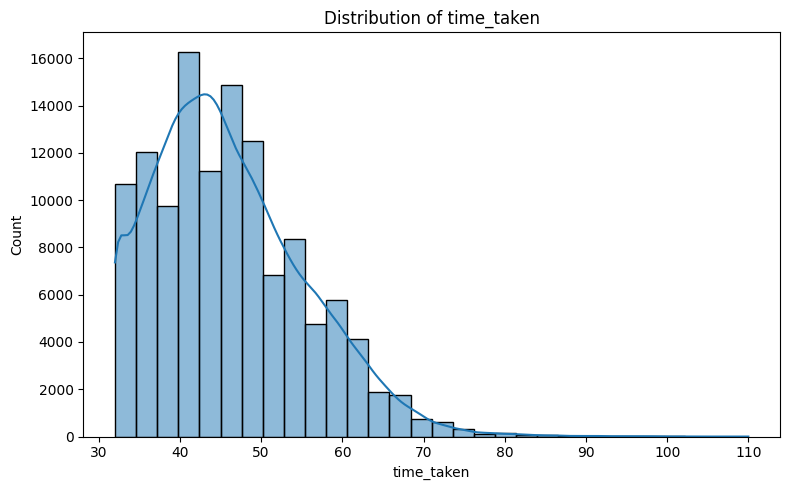

In [42]:
# Distribution of time_taken
plt.figure(figsize=(8, 5))
sns.histplot(data=y_train, kde = True, bins = 30)
plt.title('Distribution of time_taken')
plt.tight_layout()
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

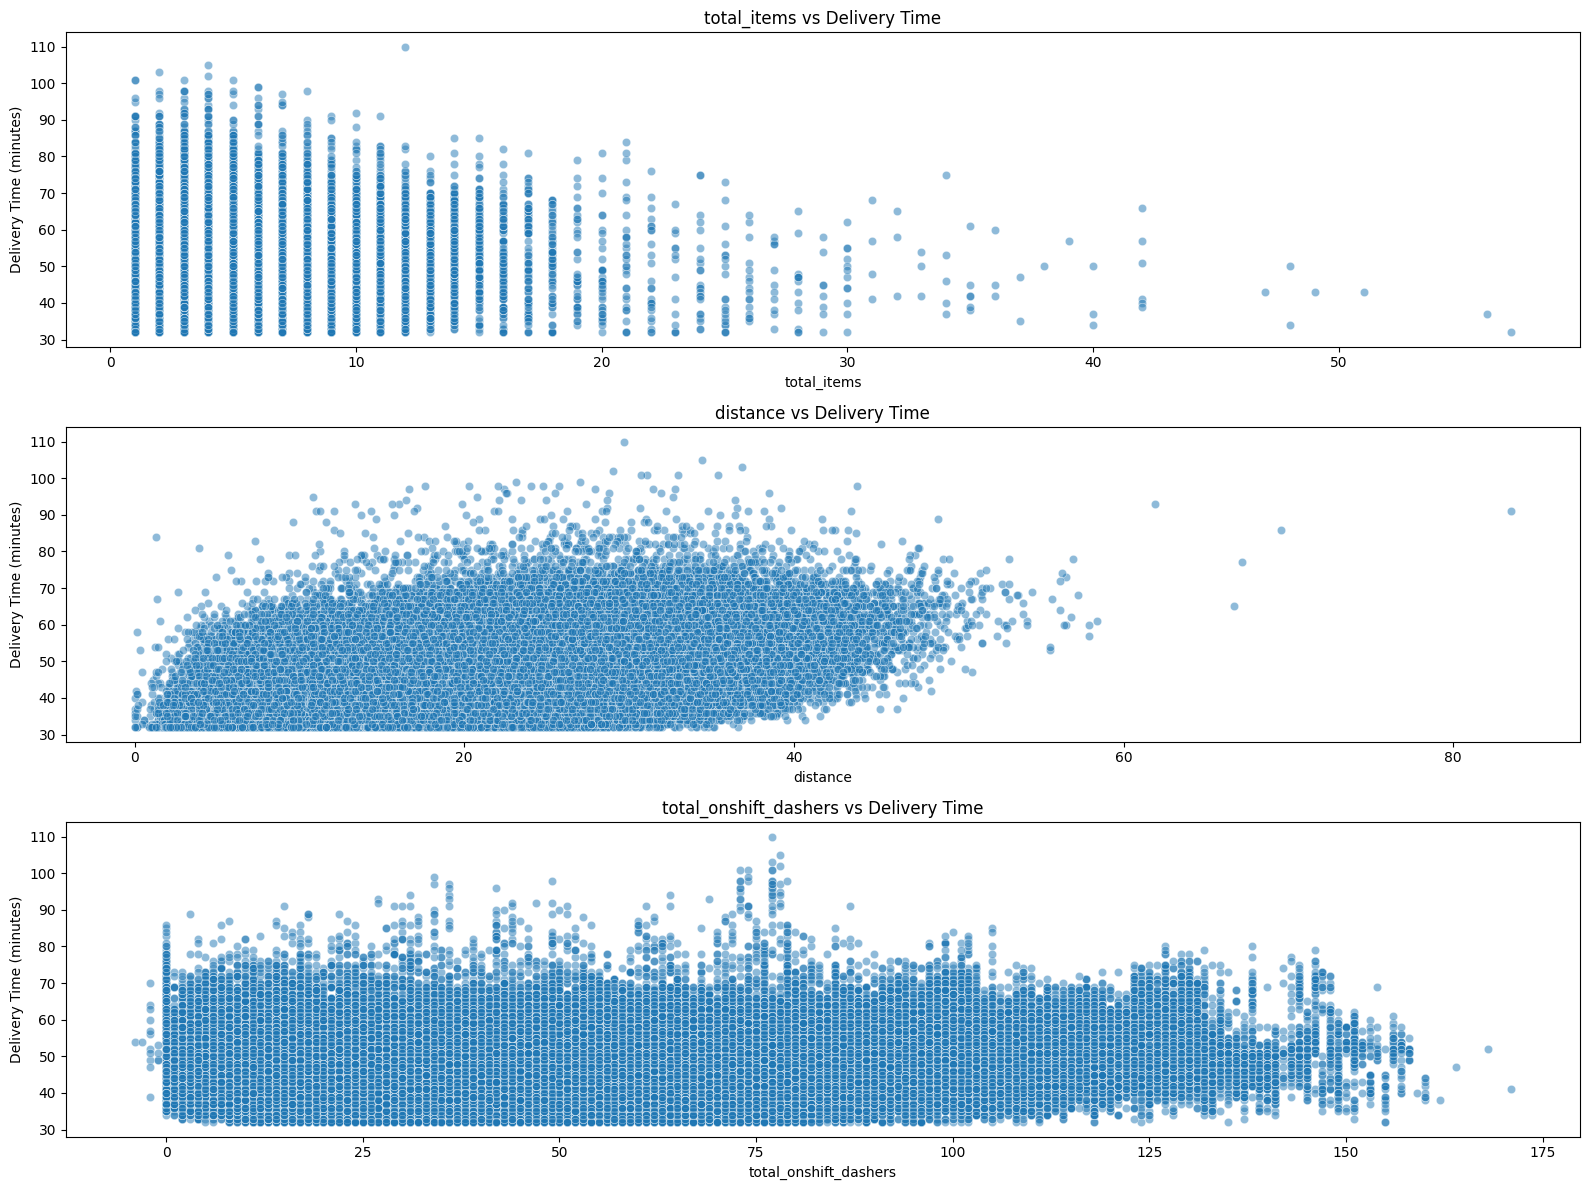

In [45]:
# Scatter plot to visualise the relationship between time_taken and other features
imp_num_features = ['total_items', 'distance', 'total_onshift_dashers']
plt.figure(figsize=(16, 12))

for i, col in enumerate(imp_num_features, 1):
    plt.subplot(len(imp_num_features), 1, i)
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.5)
    plt.title(f'{col} vs Delivery Time')
    plt.xlabel(col)
    plt.ylabel('Delivery Time (minutes)')
    
plt.tight_layout()
plt.show()

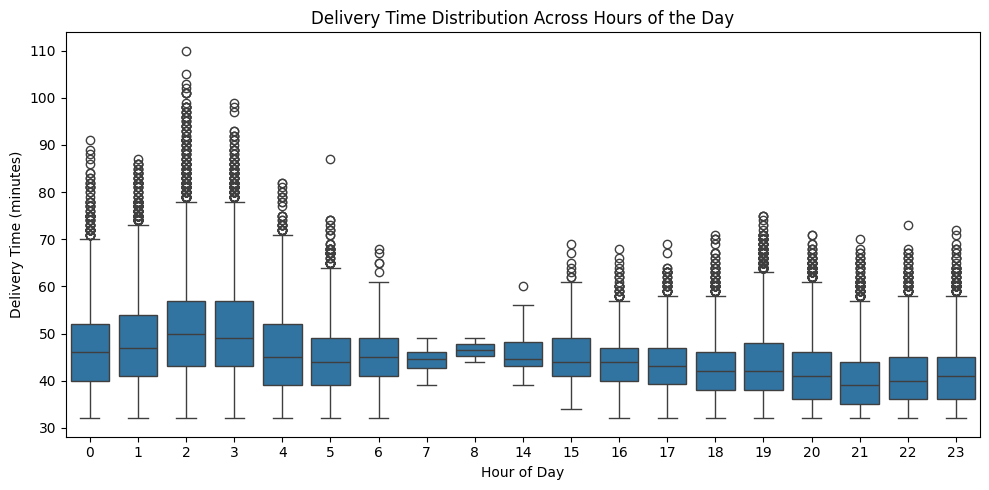

In [46]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(10, 5))
sns.boxplot(x=X_train['order_hour'], y=y_train)
plt.title('Delivery Time Distribution Across Hours of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Delivery Time (minutes)')
plt.tight_layout()
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

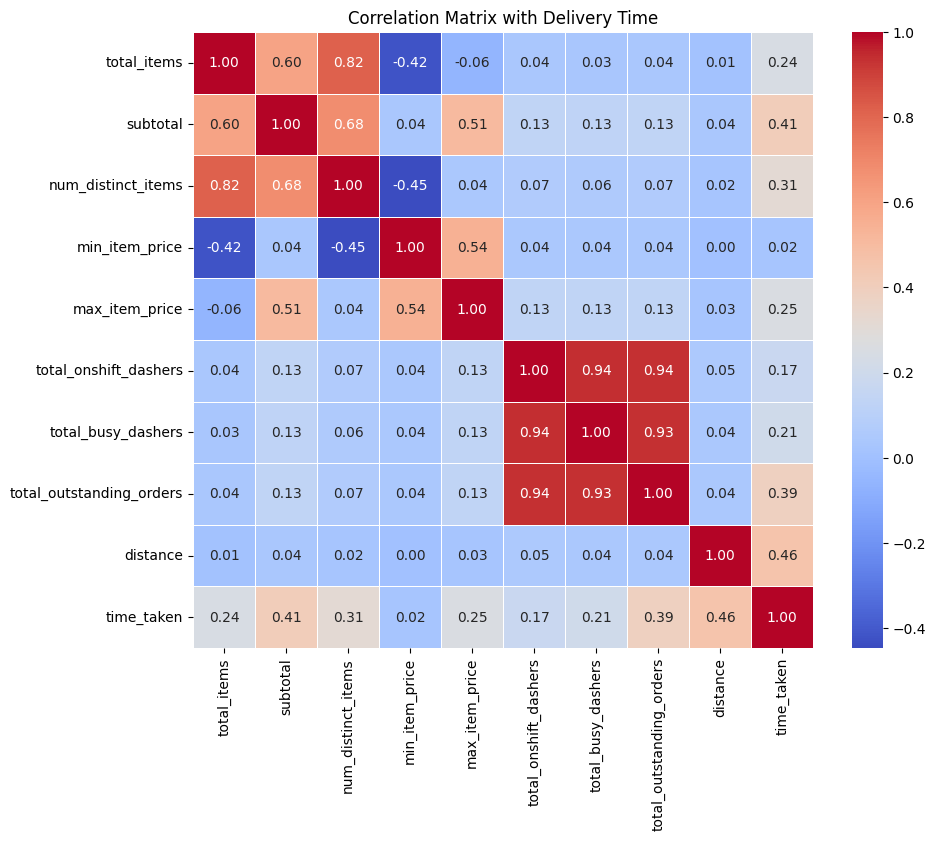

In [49]:
# Plot the heatmap of the correlation matrix
numerical_df = X_train[numerical_cols].copy()
numerical_df['time_taken'] = y_train
correlation_matrix = numerical_df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix with Delivery Time')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [51]:
# Drop 3-5 weakly correlated columns from training dataset
weak_features = ['min_item_price', 'total_items', 'max_item_price', 'total_busy_dashers'] 

X_train = X_train.drop(columns=weak_features) #dropping from train data
X_test = X_test.drop(columns=weak_features) # dropping from test data

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [54]:
# Re-identify numerical columns in X_train
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

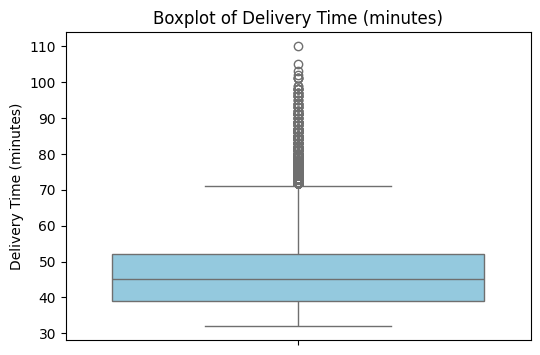

In [55]:
# Boxplot for time_taken
plt.figure(figsize=(6, 4))
sns.boxplot(y=y_train, color='skyblue')
plt.title('Boxplot of Delivery Time (minutes)')
plt.ylabel('Delivery Time (minutes)')
plt.show()

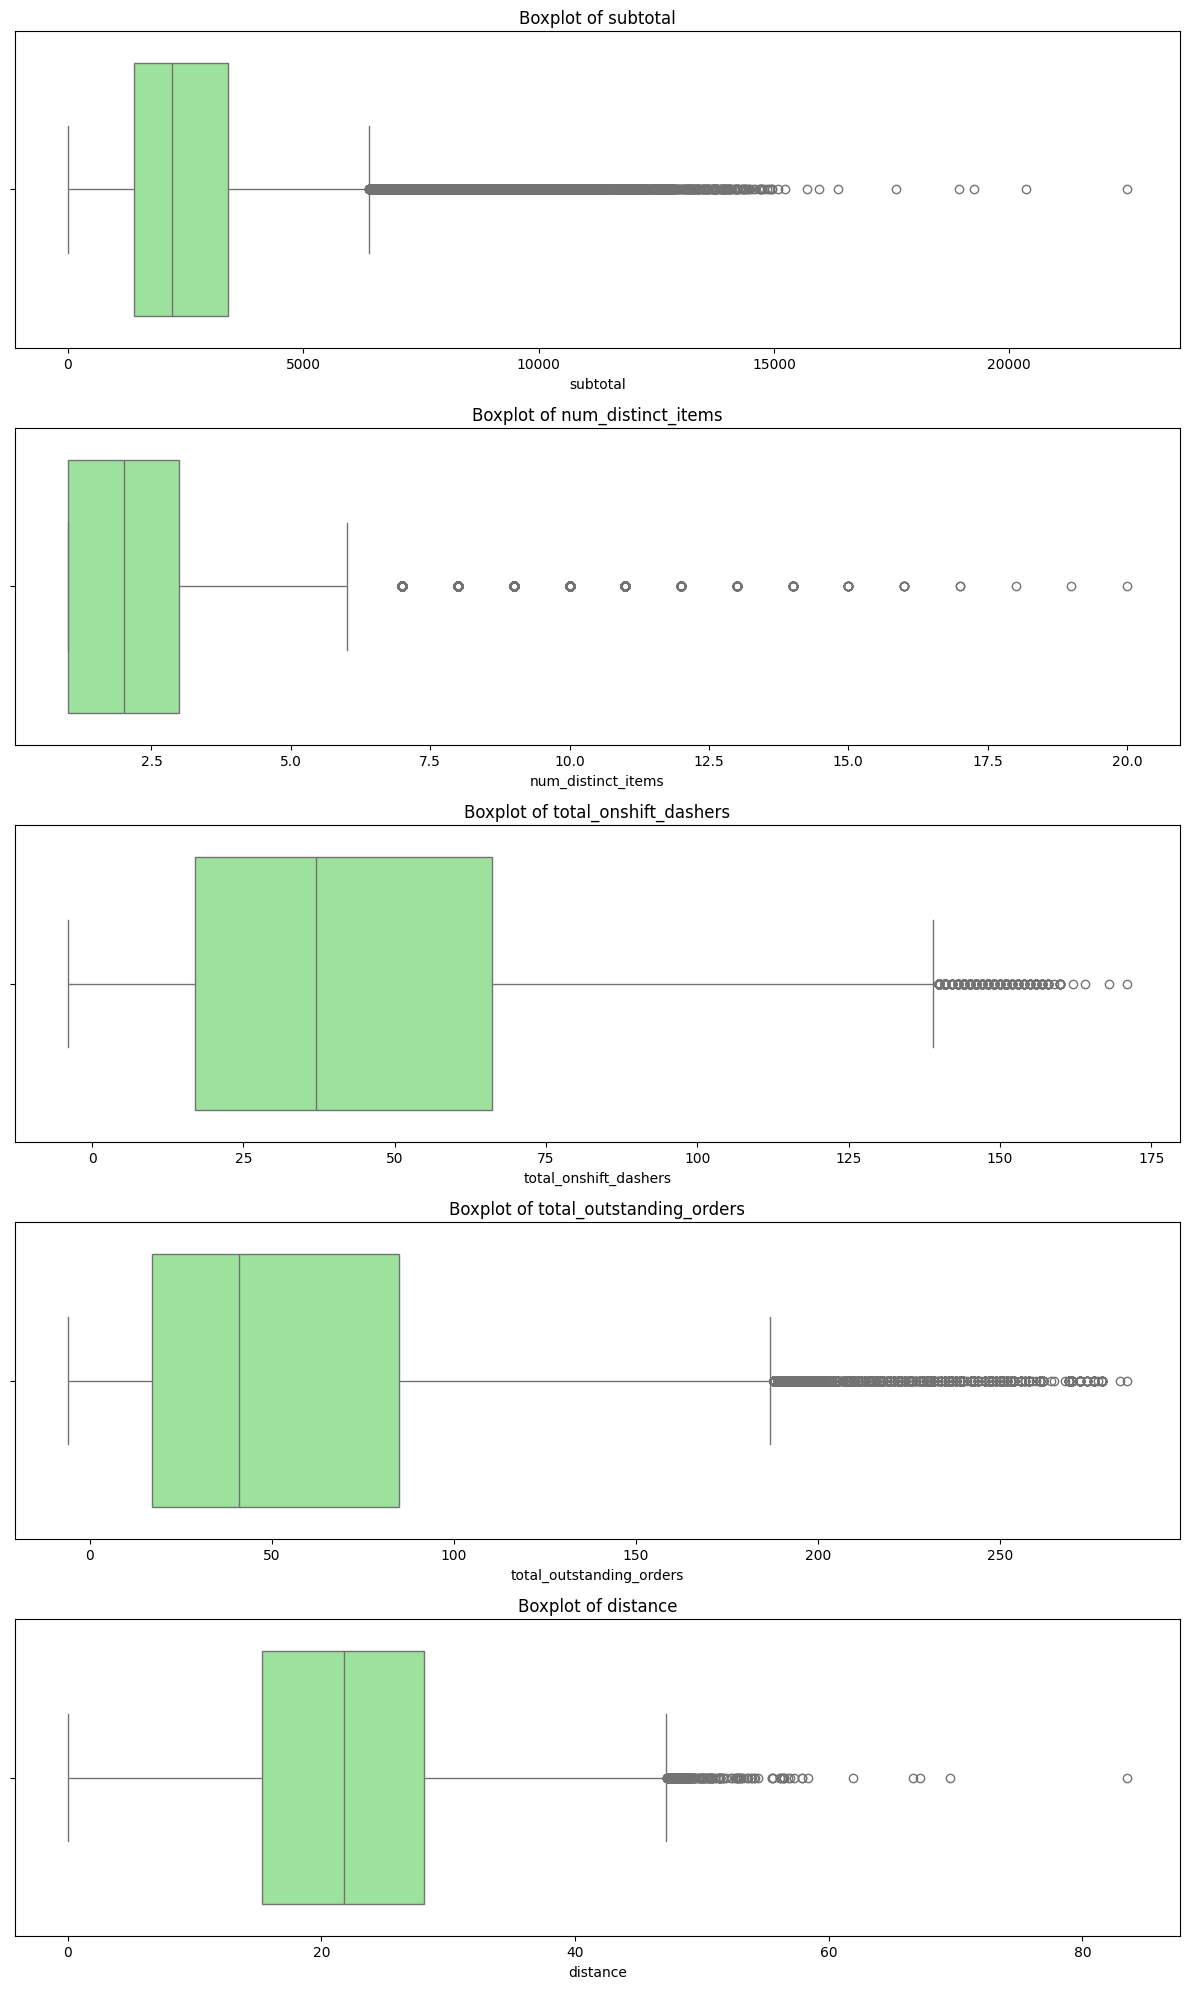

In [56]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 4 * len(numerical_cols)))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x=X_train[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [58]:
# Handle outliers
def cap_outliers_iqr(df, cols):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    for col in cols:
        df.loc[df[col] < lower_bound[col], col] = lower_bound[col]
        df.loc[df[col] > upper_bound[col], col] = upper_bound[col]

cap_outliers_iqr(X_train, numerical_cols)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

#### Note:
###### performing EDA on testing data set is not a great idea as there is a chance of - data leakage and unfair model evaluation

In [61]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [64]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [66]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [68]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [70]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [72]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [75]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [77]:
X_train_unscaled = X_train.copy() # making an unscaled copy for coeff analysis in further section of this project

In [78]:
# Apply scaling to the numerical columns
scaler = StandardScaler()
 
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
X_train.head()

,market_id,store_primary_category,order_protocol,subtotal,num_distinct_items,total_onshift_dashers,total_outstanding_orders,distance,order_hour,order_dayofweek,isWeekend
61775,2.0,53,2.0,-0.101577,0.974448,-0.172440,-0.641734,-1.760592,22,1,0
13797,2.0,55,3.0,-1.276038,-1.127998,0.321469,0.914500,1.259282,3,5,1
3700,1.0,13,3.0,1.166946,2.376079,0.641057,0.165931,1.869681,3,3,0
24419,1.0,57,1.0,0.128351,0.273633,-0.724456,-0.681133,1.016039,2,4,0
90346,4.0,39,1.0,1.859342,1.675264,0.815378,0.481118,-1.641266,1,4,0


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [82]:
# Create/Initialise the model
X_train_sm = sm.add_constant(X_train)

In [83]:
# Train the model using the training data
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 5.900e+04
Date:                Tue, 10 Jun 2025   Prob (F-statistic):               0.00
Time:                        20:13:58   Log-Likelihood:            -3.3612e+05
No. Observations:              123043   AIC:                         6.723e+05
Df Residuals:                  123031   BIC:                         6.724e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       51.6998      0.042   1223.941      0.000      51.617      51.783
market_id                   -0.6492      0.008    -81.093      0.000      -0.665      -0.634
store_primary_category       0.0038      0.001      7.326      0.000       0.003       0.005
order_protocol              -0.7479      0.007   -104.678      0.000      -0.762      -0.734
subtotal                     2.4981      0.015    170.713      0.000       2.469       2.527
num_distinct_items           0.6100      0.014     42.582      0.000       0.582       0.638
total_onshift_dashers      -15.3676      0.032   -483.032      0.000     -15.430     -15.305
total_outstanding_orders    16.7231      0.032    528.822      0.000      16.661      16.785
distance                     4.1324      0.011    389.240      0.000       4.112       4.153
order_hour                  -0.2437      0.001   -181.180      0.000      -0.246      -0.241
order_dayofweek             -0.0610      0.009     -6.849      0.000      -0.078      -0.044
isWeekend                    1.5972      0.038     41.727      0.000       1.522       1.672
==============================================================================
Omnibus:                    32529.205   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           115757.824
Skew:                           1.308   Prob(JB):                         0.00
Kurtosis:                       6.967   Cond. No.                         191.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
5,total_onshift_dashers,8.95
6,total_outstanding_orders,8.88
9,order_dayofweek,8.43
10,isWeekend,4.26
0,market_id,3.87
2,order_protocol,3.85
1,store_primary_category,3.45
8,order_hour,2.28
3,subtotal,1.90
4,num_distinct_items,1.83


In [85]:
# Make predictions
y_train_pred = lr.predict(X_train_sm)
y_train_pred

61775    28.666395
13797    60.607961
3700     52.956287
24419    54.215377
90346    42.414342
           ...    
66455    48.809250
53459    58.048545
10742    33.846781
49689    43.038303
61615    57.028171
Length: 123043, dtype: float64

In [86]:
# Find results for evaluation metrics
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 2.71
Mean Squared Error (MSE): 13.81
Root Mean Squared Error (RMSE): 3.72
R-squared (R²): 0.84


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [90]:
# Loop through the number of features and test the model
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=8)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=8)

In [91]:
list(zip(X_train,rfe.support_,rfe.ranking_))

[('market_id', True, 1),
 ('store_primary_category', False, 4),
 ('order_protocol', True, 1),
 ('subtotal', True, 1),
 ('num_distinct_items', True, 1),
 ('total_onshift_dashers', True, 1),
 ('total_outstanding_orders', True, 1),
 ('distance', True, 1),
 ('order_hour', False, 2),
 ('order_dayofweek', False, 3),
 ('isWeekend', True, 1)]

In [92]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['market_id', 'order_protocol', 'subtotal', 'num_distinct_items',
       'total_onshift_dashers', 'total_outstanding_orders', 'distance',
       'isWeekend'],
      dtype='object')

In [93]:
rfe_col_dropped = X_train.columns[~rfe.support_]
rfe_col_dropped

Index(['store_primary_category', 'order_hour', 'order_dayofweek'], dtype='object')

In [94]:
# Build the final model with selected number of features
X_train_rfe = X_train[rfe_col]

X_train_rfe = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfe).fit()
lm_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                 6.069e+04
Date:                Tue, 10 Jun 2025   Prob (F-statistic):               0.00
Time:                        20:14:00   Log-Likelihood:            -3.5076e+05
No. Observations:              123043   AIC:                         7.015e+05
Df Residuals:                  123034   BIC:                         7.016e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       50.0239      0.038   1331.888      0.000      49.950      50.098
market_id                   -0.6802      0.009    -75.479      0.000      -0.698      -0.662
order_protocol              -0.8237      0.008   -102.901      0.000      -0.839      -0.808
subtotal                     2.8517      0.016    174.789      0.000       2.820       2.884
num_distinct_items           0.5915      0.016     36.691      0.000       0.560       0.623
total_onshift_dashers      -14.8444      0.035   -422.212      0.000     -14.913     -14.775
total_outstanding_orders    16.9983      0.035    483.538      0.000      16.929      17.067
distance                     4.1412      0.012    346.325      0.000       4.118       4.165
isWeekend                    1.1655      0.025     46.075      0.000       1.116       1.215
==============================================================================
Omnibus:                    23934.296   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61419.298
Skew:                           1.068   Prob(JB):                         0.00
Kurtosis:                       5.723   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
X_vif = X_train_rfe.drop(columns='const', errors='ignore')

In [96]:
vif = pd.DataFrame()
vif['Feature'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Feature,VIF
4,total_onshift_dashers,8.67
5,total_outstanding_orders,8.67
0,market_id,2.87
1,order_protocol,2.85
2,subtotal,1.86
3,num_distinct_items,1.82
7,isWeekend,1.46
6,distance,1.00


In [97]:
# make prediction based on final model 
y_train_rfe_pred = lm_rfe.predict(X_train_rfe)
y_train_rfe_pred

61775    31.663380
13797    59.039808
3700     52.653019
24419    52.431617
90346    42.050310
           ...    
66455    47.416644
53459    55.859097
10742    35.590653
49689    42.362495
61615    55.514524
Length: 123043, dtype: float64

In [98]:
mae2 = mean_absolute_error(y_train, y_train_rfe_pred)
mse2 = mean_squared_error(y_train, y_train_rfe_pred)
rmse2 = np.sqrt(mse)
r22 = r2_score(y_train, y_train_rfe_pred)

print(f"Mean Absolute Error (MAE): {mae2:.2f}")
print(f"Mean Squared Error (MSE): {mse2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse2:.2f}")
print(f"R-squared (R²): {r22:.2f}")

Mean Absolute Error (MAE): 3.15
Mean Squared Error (MSE): 17.52
Root Mean Squared Error (RMSE): 3.72
R-squared (R²): 0.80


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

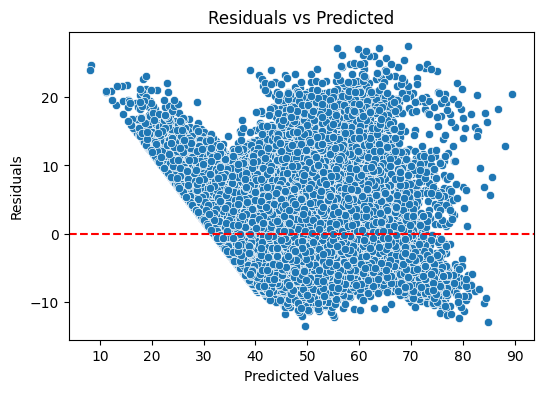

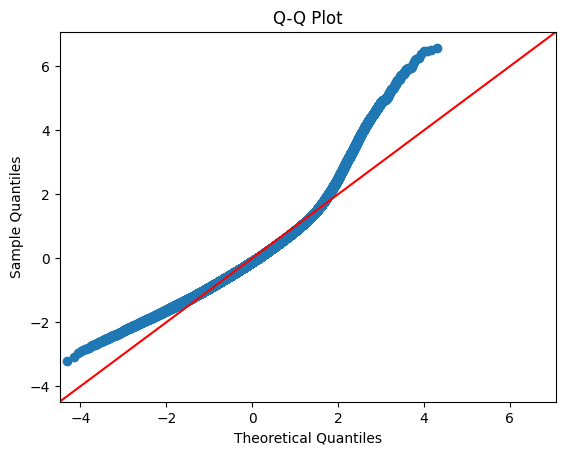

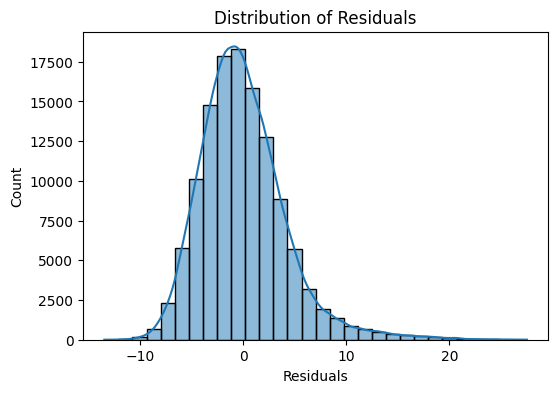

In [101]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
# residual analysis on training data
residuals_train = y_train - y_train_rfe_pred

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_train_rfe_pred, y=residuals_train)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

sm.qqplot(residuals_train, line='45', fit=True)
plt.title("Q-Q Plot")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(residuals_train, kde=True, bins=30)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

In [102]:
X_test.head() #scaling on test data set is already done

,market_id,store_primary_category,order_protocol,subtotal,num_distinct_items,total_onshift_dashers,total_outstanding_orders,distance,order_hour,order_dayofweek,isWeekend
109371,1.0,7,3.0,0.321046,-1.127998,0.030934,-0.168954,1.043576,1,4,0
134252,4.0,10,1.0,-1.178057,-0.427183,-1.131205,-1.075116,-1.971708,16,0,0
40232,1.0,28,4.0,-0.650921,0.273633,-0.898777,-0.937222,-0.145097,21,0,0
164078,2.0,4,1.0,-0.573843,-1.127998,0.321469,0.303825,0.373513,20,2,0
133490,2.0,13,2.0,0.258992,0.273633,0.263362,0.481118,0.983913,20,4,0


In [103]:
X_test.describe()

,subtotal,num_distinct_items,total_onshift_dashers,total_outstanding_orders,distance,order_hour,order_dayofweek
count,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000
mean,0.067944,0.051736,-0.005177,0.011906,0.005660,8.431259,3.229548
std,1.196341,1.135132,1.001772,1.039170,1.007849,8.656909,2.042725
min,-1.700620,-1.127998,-1.363633,-1.252409,-2.504087,0.000000,0.000000
25%,-0.769804,-0.427183,-0.811617,-0.799328,-0.741729,2.000000,1.000000
50%,-0.234177,-0.427183,-0.230547,-0.326548,-0.002824,3.000000,3.000000
75%,0.543136,0.273633,0.582950,0.540215,0.726903,19.000000,5.000000
max,15.805249,10.785866,3.604511,4.342154,5.348502,23.000000,6.000000


In [104]:
X_test_sm = sm.add_constant(X_test)

In [105]:
X_test_sm = X_test_sm.drop(columns=rfe_col_dropped)
X_test_sm.head()

,const,market_id,order_protocol,subtotal,num_distinct_items,total_onshift_dashers,total_outstanding_orders,distance,isWeekend
109371,1.0,1.0,3.0,0.321046,-1.127998,0.030934,-0.168954,1.043576,0
134252,1.0,4.0,1.0,-1.178057,-0.427183,-1.131205,-1.075116,-1.971708,0
40232,1.0,1.0,4.0,-0.650921,0.273633,-0.898777,-0.937222,-0.145097,0
164078,1.0,2.0,1.0,-0.573843,-1.127998,0.321469,0.303825,0.373513,0
133490,1.0,2.0,2.0,0.258992,0.273633,0.263362,0.481118,0.983913,0


In [106]:
y_test_pred = lm_rfe.predict(X_test_sm)

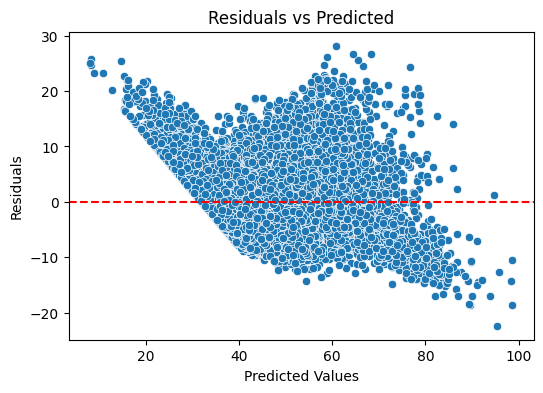

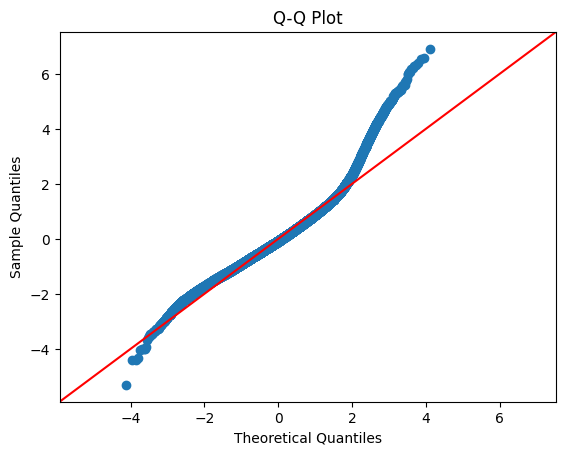

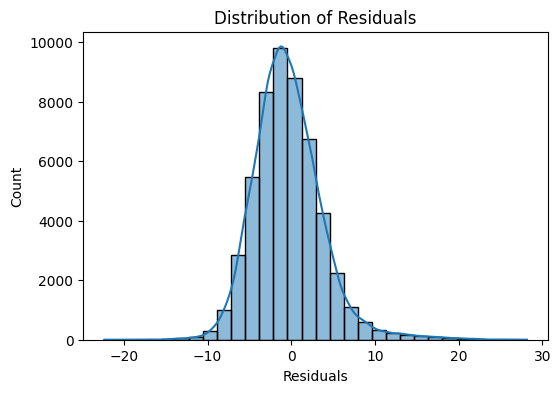

In [107]:
# residual analysis on testing data
residuals_test = y_test - y_test_pred

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_pred, y=residuals_test)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

sm.qqplot(residuals_test, line='45', fit=True)
plt.title("Q-Q Plot")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(residuals_test, kde=True, bins=30)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

In [108]:
mae_t = mean_absolute_error(y_test, y_test_pred)
mse_t = mean_squared_error(y_test, y_test_pred)
rmse_t = np.sqrt(mse)
r2_t = r2_score(y_test, y_test_pred)

print(f"Mean Absolute Error (MAE): {mae_t:.2f}")
print(f"Mean Squared Error (MSE): {mse_t:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_t:.2f}")
print(f"R-squared (R²): {r2_t:.2f}")

Mean Absolute Error (MAE): 3.15
Mean Squared Error (MSE): 17.26
Root Mean Squared Error (RMSE): 3.72
R-squared (R²): 0.80


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [112]:
lm_rfe.params

const                       50.023936
market_id                   -0.680156
order_protocol              -0.823690
subtotal                     2.851675
num_distinct_items           0.591477
total_onshift_dashers      -14.844400
total_outstanding_orders    16.998267
distance                     4.141200
isWeekend                    1.165451
dtype: float64

##### ***Final Linear Regression Equation***

**Delivery Time (minutes)** =
50.024 + 16.998 × <span style="color:blue">total_outstanding_orders</span>
−14.844 × <span style="color:blue">total_onshift_dashers</span>
+4.141 × <span style="color:blue">distance</span>
+2.851 × <span style="color:blue">subtotal</span>
+1.165 × <span style="color:blue">isWeekend</span>
+0.591 × <span style="color:blue">num_distinct_items</span>
−0.824 × <span style="color:blue">order_protocol</span>
−0.680 × <span style="color:blue">market_id</span>

In [114]:
# Compare the scaled vs unscaled features used in the final model

#building model with unscaled features
X_train_unscaled = sm.add_constant(X_train_unscaled[rfe_col])

lm_unscaled = sm.OLS(y_train, X_train_unscaled).fit()

coeff_comparison = pd.DataFrame({
    'Feature': rfe_col,
    'Unscaled Coefficient': lm_unscaled.params.drop('const').values ,
    'Scaled Coefficient': lm_rfe.params.drop('const').values
})
coeff_comparison = coeff_comparison.round(3)
coeff_comparison

,Feature,Unscaled Coefficient,Scaled Coefficient
0,market_id,-0.680,-0.680
1,order_protocol,-0.824,-0.824
2,subtotal,0.002,2.852
3,num_distinct_items,0.415,0.591
4,total_onshift_dashers,-0.431,-14.844
5,total_outstanding_orders,0.335,16.998
6,distance,0.475,4.141
7,isWeekend,1.165,1.165


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

**Analyze the effect of a unit change in a feature, say 'total_items'**:

- A 1 km increase in delivery distance increases delivery time by ~0.47 minutes.
- An additional outstanding order increases delivery time by ~0.33 minutes.
- Each additional dasher on shift helps reduce delivery time by ~0.44 minutes.
- More unique items ordered lead to a modest increase of ~0.35 minutes per item.
- The subtotal has a negligible effect (~0.002 min per ₹1 increase).


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> Yes there are categorical variables in the data.
> In my analysis i selected 3 categorical variable -
> 1. market_id
> 2. order_protocol
> 3. isWeekend  



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>test_size = 0.2 means that the data is split into two  part i.e. 80% for training the model and 20% of whole data for validating the model



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Based on my heatmap, distance shows the highest correlation with target variable



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> Box plot was used to detect the outliers. And
> Capping the outlier with IQR was used to handle the outliers



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> 1. total_outstanding_orders
> 2. total_onshift_dashers
> 3. distance



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear regression is a supervised learning algorithm used to model the relationship between a target variable and one or more features variables. The goal is to fit a line that predicts the target variable using the input features.
>
>Mathematical Equation: y = b0 + b1X1 + b2X2 + ... + bnXn + e
>- y = target variable
>- b0 = intercept
>- bi = Coefficients of corresponding features
>- Xi = features
>- e = error
>
>Assumption: Linearity, Homoscedasticity, No multicollinearity, Normality of residuals




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>- Simple linear regresson means when we study the relationship between target variable and one feature only.
>- where as multiple linear regression means when we study the relationship between target variable and more than one feature at once.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> The cost function in linear regression measures the difference between the actual values and the predicted values generated by the model. It quantifies the error in prediction. The most commonly used cost function is the Mean Squared Error (MSE).
> The algorithm minimizes the MSE by adjusting the coefficients- can be done by two methods
> 1. OLS
> 2. Gradient Descent 




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>- Overfitting : occurs when a model learns too much from the training data, including noise and outliers. It performs very well on training data but poorly on unseen test data, as it fails to generalize.
>- Underfitting: happens when a model is too simple to capture the underlying patterns in the data. It performs poorly on both training and test data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> A residual plot displays the residuals on the y-axis and the predicted values on the x-axis.
> - residuals = actual - predicted
>   
> - Residual Plots Reveal:
>  --Linearity
>  -- Homoscedasticity
>  -- Outliers and Influential Points
>   
> - Residual plots are essential for visually validating key regression assumptions. If patterns are seen in the residuals, it signals that the model may be mis-specified indicaring the need for transformations, feature engineering, or trying non-linear models.

**Analysis done by:**
_ADIT KUMAR YADAV_